<a href="https://colab.research.google.com/github/Nervith/MLAssignment2/blob/main/W2025/Assignments/Assignment2/Ass2_SYSC4415_W25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYSC4415 Assignment 2 – Fire Hydrant Detection 🚒

"""
Special thanks to Nader Ibrahim for assembling the dataset. For more details, please refer to the paper:

Ibrahim N, Dick K, Green JR. Computer Vision Fire Hydrant Obstruction Detection System. In2024 IEEE Canadian Conference on Electrical and Computer Engineering (CCECE) 2024 Aug 6 (pp. 799-805). IEEE.


Questions? Please use the Brightspace Discussion Board.

Deadline: See Brightspace end date.
"""

## Instructions
DO NOT wait until the last minute to complete this assignment as training the models might take longer. Also leverage the free GPU provided by colab to make your training faster.


Follow all steps carefully. Your solutions must be self-contained in this notebook. No other supplementary materials or files will be accepted. As soon as I open your notebook, I will click "Runtime" → "Run all". Ensure your notebook runs without errors and displays results clearly.


You are asked to provide both code and text to address discussion questions. For the text answers, see the markdown cells with the ❓ emoji for questions and enter your answers following the ✅ emoji.

Provide sufficient comments in your code to describe its functionality. Do not remove any necessary libraries as this will cause errors.

Download the dataset from Brightspace and store it in your Google Drive under "My Drive" (not in any subfolder). Check the file location via right-click → File Information → Details → Location.

Submit your notebook as a `.ipynb` file named: `SYSC4415W25_A2_FIRSTNAME_LASTNAME_StudentID.ipynb` on Brightspace. No other submission methods will be accepted.


## Dataset
Provided on Brightspace.

#### Dataset details:
- Training Images: 2,272  
- Validation Images: 563  
- Labels: 0 = No Fire Hydrant, 1 = Fire Hydrant  
- Imbalanced dataset (most images do not contain a hydrant).

#### Dataset Information
The dataset contains two main folders:
- `train/`: Contains the training images and a CSV file with labels.
- `valid/`: Contains the validation images and a CSV file with labels.

Each folder includes:
- Images of fire hydrants and non-fire hydrants.
- A CSV file (`_classes.csv`) mapping each image filename to its label:
  - `0` for no fire hydrant.
  - `1` for fire hydrant.

Ensure the zip file of the dataset (FH_detection_data.zip) to your Google Drive and placed under "My Drive" without any subfolders to keep the paths consistent.



## Steps

### 1) Initial Setup
Import necessary libraries


In [17]:
# Import all the necessary libraries here

import pandas as pd
import os

Mount Google Drive and unzip the dataset.

In [18]:
## Code provided by Akash. DO NOT CHANGE THIS CELL

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Unzip the dataset
!unzip /content/drive/MyDrive/FH_detection_data.zip -d /content/


# Dataset path
train_data_path = "/content/train"
valid_data_path = "/content/valid"
train_label = pd.read_csv('/content/train/_classes.csv')
valid_label = pd.read_csv('/content/valid/_classes.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/FH_detection_data.zip
replace /content/train/10063782964_891eedde4e_z_jpg.rf.4caba9d0e35546b469aa896df780d833.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: /content/train/10063782964_891eedde4e_z_jpg.rf.4caba9d0e35546b469aa896df780d833.jpg  
 extracting: /content/train/100_PNG.rf.d52fbff94c483761d0644a1e8abe4c95.jpg  
 extracting: /content/train/101_PNG.rf.f1335e18f815c8c8044a94c09db7f025.jpg  
 extracting: /content/train/102378468_d8132a415b_z_jpg.rf.6bc008d0d532d3365f580b7aaa7623e3.jpg  
 extracting: /content/train/102_PNG.rf.160c945e0881c92a078a14069d9a6b9a.jpg  
 extracting: /content/train/102_jpg.rf.17df75e9dda0f851c9f5e1d554f07488.jpg  
 extracting: /content/train/103357395_388d701e12_z_jpg.rf.a54c985e93402af49ba422f005e702d8.jpg  
 extracting: /content/train/103_jpg.rf.a649213f3998906bf2298607f82ee839.jpg  


----

### 2) Data Exploration
1. Load dataset into a pandas DataFrame.
2. Display display three sample images from each class
3. Create separately class distribution plots of the train and validation data
[Requires 6 sample images (three from each class) and two plots of class distribution (train and validation)]

Why is it important to check for class imbalance before training? How might this affect our model?  

Class imbalance can make the model favour the majority class, leading to biased predictions and bad generalizations. If most images are fire hydrants, the model may predict "fire hydrant" most of the time, even when thats wrong. To fix this, we can balance the dataset using oversampling, undersampling, or adjusting class weights during training.


Fire Hydrant Samples:


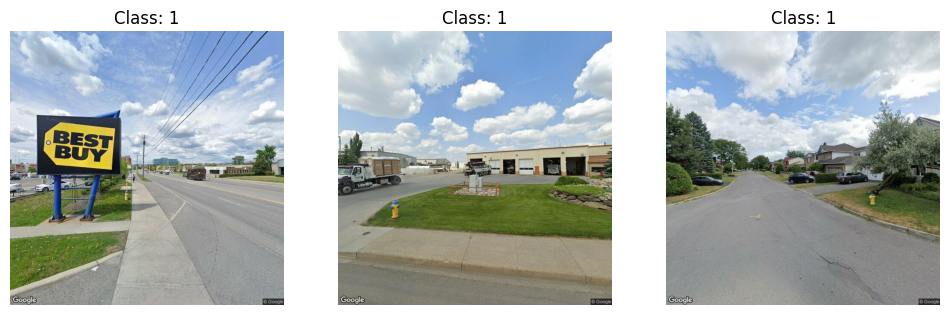

No Fire Hydrant Samples:


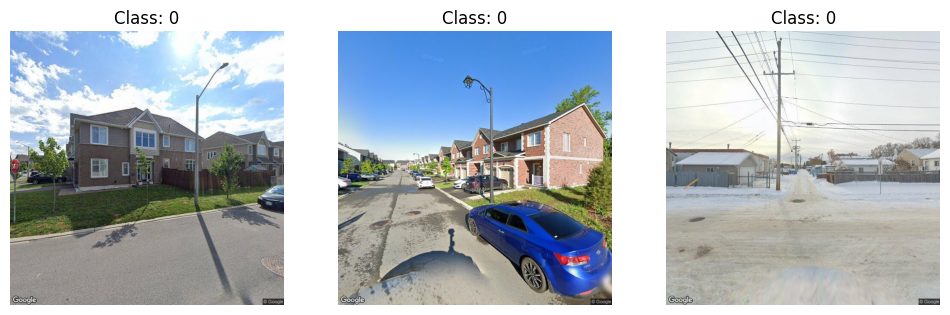

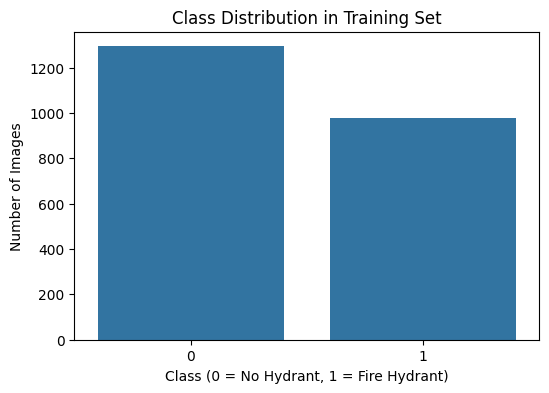

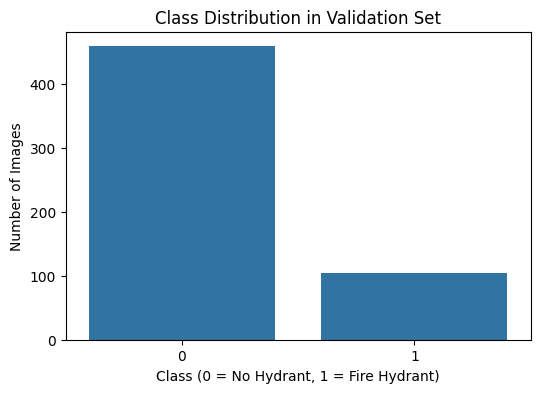

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

# Load dataset
train_df = pd.read_csv('/content/train/_classes.csv')
valid_df = pd.read_csv('/content/valid/_classes.csv')

# Define paths for images
train_image_path = "/content/train"
valid_image_path = "/content/valid"

# Display 3 Sample Images from Each Class
def show_sample_images(image_folder, df, class_label, num_samples=3):
    sample_images = df[df['Fire Hydrants'] == class_label]['filename'].sample(num_samples).tolist()

    fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))
    for i, img_file in enumerate(sample_images):
        img_path = os.path.join(image_folder, img_file)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error loading image: {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(f"Class: {class_label}")

    plt.show()

print("Fire Hydrant Samples:")
show_sample_images(train_image_path, train_df, 1)

print("No Fire Hydrant Samples:")
show_sample_images(train_image_path, train_df, 0)

plt.figure(figsize=(6,4))
sns.countplot(x=train_df['Fire Hydrants'])
plt.title("Class Distribution in Training Set")
plt.xlabel("Class (0 = No Hydrant, 1 = Fire Hydrant)")
plt.ylabel("Number of Images")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=valid_df['Fire Hydrants'])
plt.title("Class Distribution in Validation Set")
plt.xlabel("Class (0 = No Hydrant, 1 = Fire Hydrant)")
plt.ylabel("Number of Images")
plt.show()


---

### 3) Preprocessing
- Resize images to 128x128.
- Apply any other necessary transformations that you feel can help.

❓ Would one-hot encoding be necessary for binary classification? Why or why not?  
One-hot encoding is not needed for binary classification because a single-label approach is enough. Most models, including neural networks, can directly process binary labels without needing conversion into a vector. One-hot encoding is more useful for multi-class classification, where each class needs a separate category.



Image preprocessing complete
Displaying 5 Random Processed Training Images:


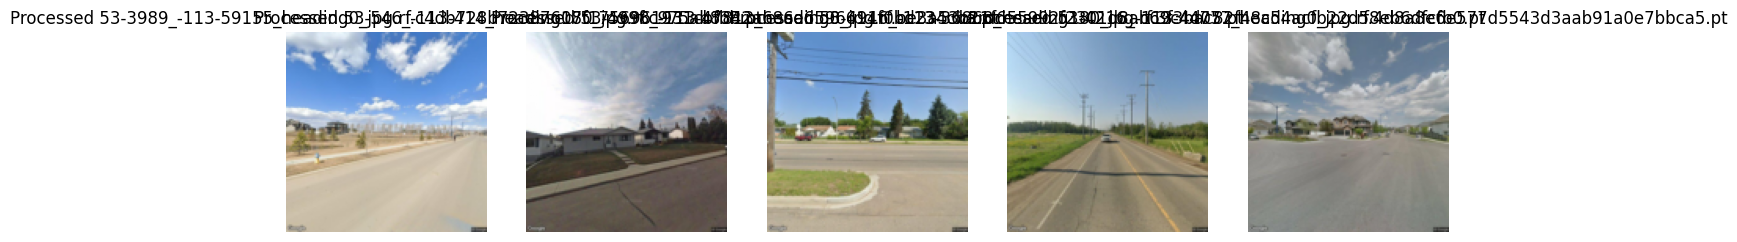

In [20]:
import cv2
import os
import numpy as np
import torch
import random
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define paths
train_image_path = "/content/train"
valid_image_path = "/content/valid"

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

def preprocess_images(image_folder, save_folder):
    os.makedirs(save_folder, exist_ok=True)
    processed_images = []

    for img_file in os.listdir(image_folder):
        if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        img_path = os.path.join(image_folder, img_file)


        image = Image.open(img_path).convert("RGB")
        image = transform(image)


        save_path = os.path.join(save_folder, img_file.replace(".jpg", ".pt"))
        torch.save(image, save_path)

        processed_images.append(save_path)

    return processed_images
processed_train_images = preprocess_images(train_image_path, "/content/preprocessed_train")
processed_valid_images = preprocess_images(valid_image_path, "/content/preprocessed_valid")

print("Image preprocessing complete")

# Display 5 random processed images TEST
def show_random_processed_images(image_paths):
    random_images = random.sample(image_paths, min(5, len(image_paths)))
    fig, axes = plt.subplots(1, len(random_images), figsize=(15, 5))

    for i, img_path in enumerate(random_images):
        tensor_image = torch.load(img_path)
        np_image = tensor_image.permute(1, 2, 0).numpy()
        np_image = (np_image * 0.5) + 0.5

        axes[i].imshow(np_image)
        axes[i].axis("off")
        axes[i].set_title(f"Processed {os.path.basename(img_path)}")

    plt.show()


print("Displaying 5 Random Processed Training Images:")
show_random_processed_images(processed_train_images)


---

### 4) Creating the Baseline Model
Create a CNN with:
- Two convolutional layers to extract features from the images.
- Max pooling layers after each convolution to reduce spatial dimensions.
- Fully connected layers to perform classification.
- A sigmoid activation function at the output layer to output a probability between 0 and 1.

Required architecture:
- Input: RGB images resized to 128x128 pixels.
- Conv2d (3 input channels, 32 output channels, kernel size 3, padding 1)
- MaxPool2d (kernel size 2, stride 2, padding 0) – applied after the first Conv2d.
- Conv2d (32 input channels, 64 output channels, kernel size 3, padding 1)
- MaxPool2d (kernel size 2, stride 2, padding 0) – applied after the second Conv2d.
- Flatten
- Linear layer with 128 units
- Output Linear layer with 1 unit and sigmoid activation



This model will be trained to classify whether an image contains a fire hydrant or not.


❓ List three ways to improve the baseline model (e.g., adding dropout to... , using batch normalization to..., or increasing the number of layers to...,
be sure to come up with your own ideas!). Provide a brief explanation for each.

Add Dropout Layers

Dropout randomly disables neurons during training, whichs stops the model from overfitting to the training data. This improves generalization and makes better performance on unseen images.

Use Batch Normalization

Batch normalization normalizes activations in the network, speeding up convergence and makes it more stable.

Increase the Number of Convolutional Layers

Adding more convolutional layers lets the model find deeper and more complex image details. This makes the system more accurate.

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FireHydrantCNN(nn.Module):
    def __init__(self):
        super(FireHydrantCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # Compute the size after convolutions and pooling
        self.flattened_size = 64 * (128 // 4) * (128 // 4)

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 1)

        # Activation function
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Conv1 -> ReLU -> MaxPool
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten feature map
        x = F.relu(self.fc1(x))  # Fully Connected Layer 1
        x = self.sigmoid(self.fc2(x))  # Output Layer with Sigmoid
        return x

# Instantiate the model
model = FireHydrantCNN()
print(model)


FireHydrantCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=65536, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


---

### 5) Training and Evaluation
Train your CNN using Binary Cross Entropy Loss and an Adam optimizer. Use a learning rate of 0.001. Iterate over your dataset for 10 epochs and track the loss. Train using the train data in /train.

Evaluate your model on the test data in /valid using Precision, Recall, and F1-Score to assess performance.


❓ Which evaluation metric you think is the most suitable in our case, and why?

In this case, I think the F1-Score is the best metric. Since the dataset is imbalanced (more images of one class than the other), accuracy without context can be misleading. F1-Score balances how many predicted hydrants were actually hydrants and how many actual hydrants were detected. A high F1-Score means the model is making meaningful predictions without weighing one class too heavily.

Display the confusion matrix.

❓ Explain the confusion matrix to a non-technical audience and relate it to your chosen metric.  
✅ Your answer here

In [22]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import os

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

class FireHydrantDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        label = int(self.data.iloc[idx, 1])

        if not os.path.exists(img_name):
            print(f" Image {img_name} not found, skipping.")
            return None

        image = Image.open(img_name).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

train_dataset = FireHydrantDataset(csv_file="/content/train/_classes.csv", root_dir="/content/train", transform=transform)
valid_dataset = FireHydrantDataset(csv_file="/content/valid/_classes.csv", root_dir="/content/valid", transform=transform)

train_dataset = [data for data in train_dataset if data is not None]
valid_dataset = [data for data in valid_dataset if data is not None]

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

print("Finished loading Dataset")


Finished loading Dataset


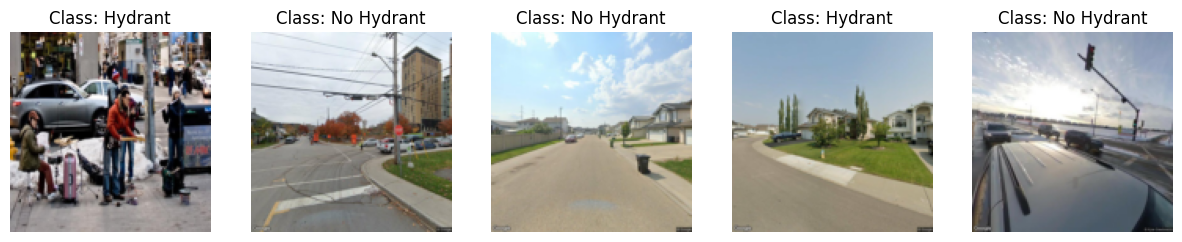

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def show_sample_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        idx = np.random.randint(0, len(dataset))
        image, label = dataset[idx]

        img = image.permute(1, 2, 0).numpy()  # Change from (C, H, W) to (H, W, C)
        img = (img * 0.5) + 0.5  # Unnormalize

        axes[i].imshow(img)
        axes[i].set_title(f"Class: {'Hydrant' if label == 1 else 'No Hydrant'}")
        axes[i].axis("off")

    plt.show()

show_sample_images(train_dataset)


Epoch 1/10, Loss: 0.6361
Epoch 2/10, Loss: 0.5111
Epoch 3/10, Loss: 0.4659
Epoch 4/10, Loss: 0.4116
Epoch 5/10, Loss: 0.3382
Epoch 6/10, Loss: 0.2415
Epoch 7/10, Loss: 0.1684
Epoch 8/10, Loss: 0.1110
Epoch 9/10, Loss: 0.0648
Epoch 10/10, Loss: 0.0449


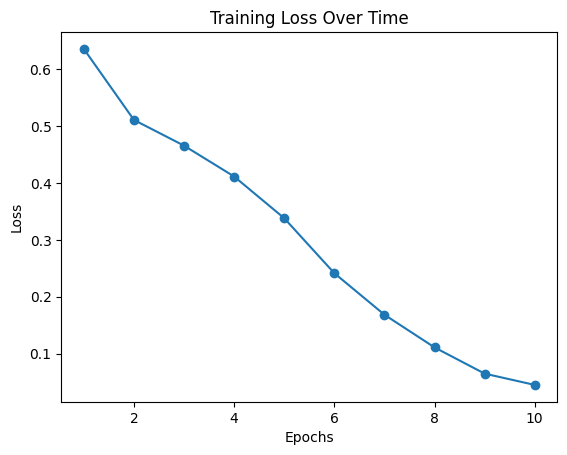

In [24]:
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FireHydrantCNN().to(device)

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

import matplotlib.pyplot as plt
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.cpu().numpy()

        outputs = model(images).cpu().numpy()
        preds = (outputs > 0.5).astype(int)  # Convert probabilities to binary predictions

        all_preds.extend(preds.flatten())
        all_labels.extend(labels.flatten())

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.7922
Precision: 0.4570
Recall: 0.6635
F1-Score: 0.5412


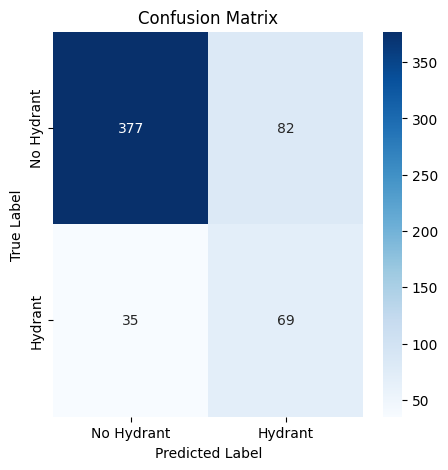

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Hydrant", "Hydrant"], yticklabels=["No Hydrant", "Hydrant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


---


### 6) Model Improvements
Apply and evaluate three improvements ideas that you mentioned in the Baseline CNN question (Step 4).
Implement each idea separately, train a model with that improvement, and report the performance of each model using the metrics from Step 5. As above, train using the data in /train and test using the data in /valid.


❓ Which model would you deploy? Why?  
✅ Your answer here

Adding dropout layers

Epoch 1/10, Loss: 0.6550
Epoch 2/10, Loss: 0.5256
Epoch 3/10, Loss: 0.4787
Epoch 4/10, Loss: 0.4360
Epoch 5/10, Loss: 0.3747
Epoch 6/10, Loss: 0.3125
Epoch 7/10, Loss: 0.2477
Epoch 8/10, Loss: 0.1773
Epoch 9/10, Loss: 0.1298
Epoch 10/10, Loss: 0.0959


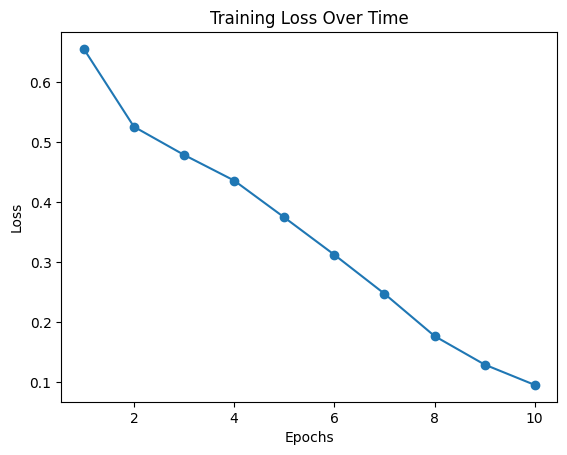

Accuracy: 0.7691
Precision: 0.4286
Recall: 0.7500
F1-Score: 0.5455


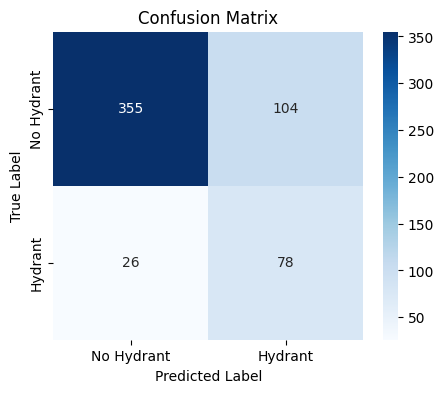

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

class FireHydrantDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        label = int(self.data.iloc[idx, 1])

        if not os.path.exists(img_name):
            return None

        image = Image.open(img_name).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label

train_dataset = FireHydrantDataset("/content/train/_classes.csv", "/content/train", transform)
valid_dataset = FireHydrantDataset("/content/valid/_classes.csv", "/content/valid", transform)

train_dataset = [data for data in train_dataset if data is not None]
valid_dataset = [data for data in valid_dataset if data is not None]

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

class ImprovedCNN1(nn.Module):
  def __init__(self):
        super(ImprovedCNN1, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

  def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ImprovedCNN1().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train Model
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# Plot Training Loss
plt.plot(range(1, num_epochs + 1), train_losses, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

# Evaluate Model
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.numpy()
        outputs = model(images).cpu().numpy()
        preds = (outputs > 0.5).astype(int)

        y_true.extend(labels)
        y_pred.extend(preds)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Hydrant", "Hydrant"], yticklabels=["No Hydrant", "Hydrant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Batch Normalization

Dataset loaded correctly!
Epoch 1/10, Loss: 0.5844
Epoch 2/10, Loss: 0.5156
Epoch 3/10, Loss: 0.4809
Epoch 4/10, Loss: 0.4511
Epoch 5/10, Loss: 0.4213
Epoch 6/10, Loss: 0.3888
Epoch 7/10, Loss: 0.3721
Epoch 8/10, Loss: 0.3507
Epoch 9/10, Loss: 0.3193
Epoch 10/10, Loss: 0.2875


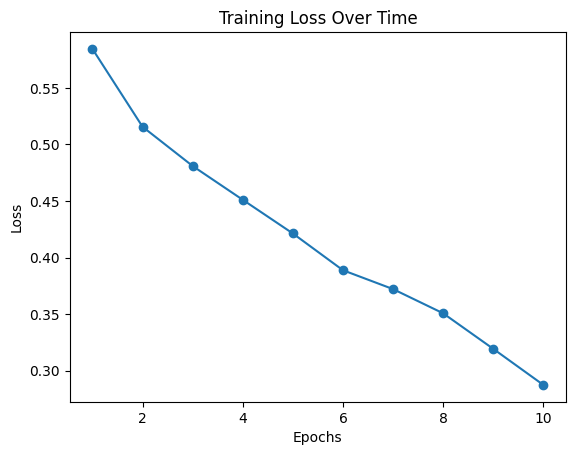

Accuracy: 0.8330
Precision: 0.5490
Recall: 0.5385
F1-Score: 0.5437


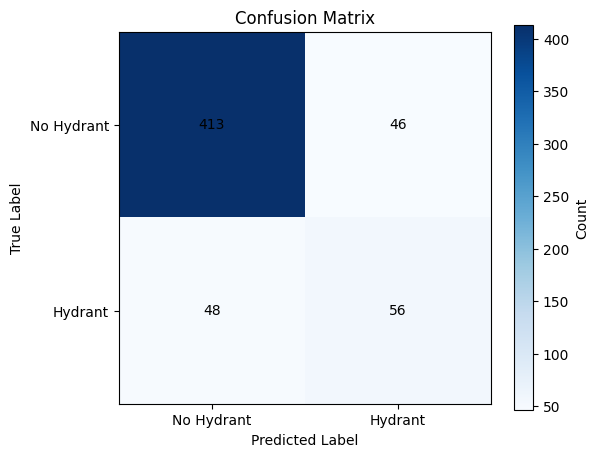

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

class FireHydrantDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        label = int(self.data.iloc[idx, 1])

        if not os.path.exists(img_name):
            print(f"Warning: Image {img_name} not found, skipping.")
            return None

        image = Image.open(img_name).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

train_dataset = FireHydrantDataset(csv_file="/content/train/_classes.csv", root_dir="/content/train", transform=transform)
valid_dataset = FireHydrantDataset(csv_file="/content/valid/_classes.csv", root_dir="/content/valid", transform=transform)

train_dataset = [data for data in train_dataset if data is not None]
valid_dataset = [data for data in valid_dataset if data is not None]

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

print("Dataset loaded correctly!")

class ImprovedCNN2(nn.Module):
    def __init__(self):
        super(ImprovedCNN2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.flatten = nn.Flatten()  # Explicitly flatten before FC layers
        self.fc1 = None  # To be defined dynamically
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.flatten(x)  # Ensure flattening before FC layers

        if self.fc1 is None:  # Define fc1 dynamically
            self.fc1 = nn.Linear(x.shape[1], 128).to(x.device)

        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ImprovedCNN2().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

plt.plot(range(1, num_epochs+1), train_losses, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)
        outputs = model(images)
        preds = (outputs > 0.5).float()

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6,5))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Count")
plt.xticks(ticks=[0,1], labels=["No Hydrant", "Hydrant"])
plt.yticks(ticks=[0,1], labels=["No Hydrant", "Hydrant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()


Deeper CNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

class FireHydrantDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        label = int(self.data.iloc[idx, 1])

        if not os.path.exists(img_name):
            print(f"⚠ Warning: Image {img_name} not found, skipping.")
            return None

        image = Image.open(img_name).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

train_dataset = FireHydrantDataset(csv_file="/content/train/_classes.csv", root_dir="/content/train", transform=transform)
valid_dataset = FireHydrantDataset(csv_file="/content/valid/_classes.csv", root_dir="/content/valid", transform=transform)

train_dataset = [data for data in train_dataset if data is not None]
valid_dataset = [data for data in valid_dataset if data is not None]

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

print("Dataset loaded correctly")

class ImprovedCNN3(nn.Module):
    def __init__(self):
        super(ImprovedCNN3, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)  # New third convolutional layer
        self.bn3 = nn.BatchNorm2d(128)

        self.fc1 = nn.Linear(128 * 16 * 16, 128)  # Adjusted size due to extra conv layer
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))  # Extra convolutional layer
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ImprovedCNN3().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

plt.plot(range(1, num_epochs+1), train_losses, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)
        outputs = model(images)
        preds = (outputs > 0.5).float()

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6,5))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Count")
plt.xticks(ticks=[0,1], labels=["No Hydrant", "Hydrant"])
plt.yticks(ticks=[0,1], labels=["No Hydrant", "Hydrant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()


Dataset loaded correctly
Epoch 1/10, Loss: 56.4807
Epoch 2/10, Loss: 56.9542
Epoch 3/10, Loss: 56.9542


---

### 7) Personal Inference Test
Test your trained model on at least FIVE new images (either collected using a camera or collected from the internet). Predict whether each image contains a fire hydrant and print the result.

Of your five images:
- Include at least one image of a fire hydrant that your model does not detect correctly.
- Include at least one image of a fire hydrant that your model does detect correctly.

❓ Challenge: Can you find an image that does not actually contain a fire hydrant, but your model believes that a hydrant is present?

✅ Your answer here

❓ Explain why you believe your model performed the way it did on each of your five images. What patterns or mistakes do you observe?

✅ Your answer here


In [ ]:
import os
import shutil
import torch
import torchvision.transforms as transforms
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')


personal_test_folder = "/content/personal_tests"
os.makedirs(personal_test_folder, exist_ok=True)
print(f"Folder created at {personal_test_folder}")

drive_folder = "/content/drive/MyDrive/ML_A2/"

for filename in os.listdir(drive_folder):
    src_path = os.path.join(drive_folder, filename)
    dst_path = os.path.join(personal_test_folder, filename)

    if filename.endswith((".jpg", ".png", ".jpeg")):  # Only move images
        shutil.move(src_path, dst_path)
        print(f"Moved: {filename}")

print("Files moved to personal_tests folder.")

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

test_images = os.listdir(personal_test_folder)

for img_name in test_images:
    img_path = os.path.join(personal_test_folder, img_name)

    image = Image.open(img_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)

    # Make prediction
    with torch.no_grad():
        output = model(image)
        prediction = "Hydrant" if output.item() > 0.5 else "No Hydrant"

    print(f"{img_name}: {prediction}")


---

### 8) (Optional) Transfer Learning with Pretrained CNN

#### Description:
In this optional step, fine-tune a pretrained CNN (e.g., ResNet50) on your dataset and compare its performance to your custom CNN.

- Use `torchvision.models.resnet50(pretrained=True)` as a starting model.

Reference: https://pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html
- Modify the final layer to fit your binary classification task (fire hydrant vs. no fire hydrant).
- Resize input images to **256x256** pixels.
- Fine-tune the model and evaluate its performance.
- Compare the results to your custom CNN in terms of accuracy, training time, and other relevant metrics.

#### Libraries to use:
```python
import torchvision.models as models
```

#### Student Code:
```python
# Your code here
```


------

### 9) Final Thoughts
❓ How would you improve the model in the future?

✅ Your answer here..


-----

## Final Question:
### ❓ Did you use an AI tool in completing your assignment? If yes, which AI tool(s) did you use? How did you prompt it? How you validate the response?

✅ Your answer here..


---

## Submission
Submit your `.ipynb` notebook on Brightspace using the following name format:  
`SYSC4415W25_A2_FIRSTNAME_LASTNAME_StudentID.ipynb`

